# <center>Estimating network structure from unreliable measurements</center>

In [1]:
import numpy as np
import networkx as nx
import random as random
from operator import itemgetter
from scipy.special import binom
import matplotlib.pyplot as plt

## 1. Erdös-Rényi with independent edge measurements : undirected case

### 1.1 Initialization

Number of nodes n and list of all node pairs.

In [2]:
n = 20
node_pairs = list()
for i in range(n):
    for j in range(i,n):
        if i != j:
            node_pairs.append((i,j))

Graph parameters $\gamma$.

In [3]:
w = np.log(n)/n # prob of an edge between two nodes
print("w = {}".format(w))

w = 0.14978661367769955


Generate graph.

In [4]:
G = nx.gnp_random_graph(n,w)
print("nb edges : ", G.number_of_edges())

nb edges :  25


Data parameters $\theta$.

In [5]:
a = 0.7 # true positive rate
b = 0.3 # false positive rate

Generate data.

In [6]:
n_obs = 5 # nb of times we observe each node pair
N = {e:n_obs for e in node_pairs} # nb obs for each node pair
E = {e:0 for e in node_pairs} # nb edges seen during observations for each node pair

for k in range(n_obs):
    for e in node_pairs:
        dice = random.random()
        # if true positive
        if e in G.edges and dice < a:
            E[e] += 1
        # if false positive
        elif e not in G.edges and dice < b:
            E[e] += 1

### 1.2 Iterations

Choose number of repetitions of the whole algorithm and max iterations for each repetition.

In [7]:
repetitions = 100
max_iter = 100

Proceed.

In [8]:
# at each repetition we save the values of w, a and b
results = {'w':list(), 'a':list(), 'b':list()}

# we do multiple repetitions and then take the mean
for k in range(repetitions):
    
    try:
        
        # random initialization of the parameters
        w = random.random()
        a = random.random()
        b = random.random()

        # iter
        for l in range(max_iter):

            old_w, old_a, old_b = w, a, b

            # compute Qij
            Q = dict()
            for (i,j) in N:
                Q[i,j] = w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j])
                Q[i,j] /= w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j]) + (1-w) * b**E[i,j] * (1-b)**(N[i,j]-E[i,j])

            # update w,a,b
            w = sum(Q.values()) / binom(n,2)
            numerator_a, numerator_b = 0, 0
            denominator_a, denominator_b = 0, 0
            for (i,j) in N:
                numerator_a += Q[i,j] * E[i,j]
                numerator_b += (1-Q[i,j]) * E[i,j]
                denominator_a += Q[i,j] * N[i,j]
                denominator_b += (1-Q[i,j]) * N[i,j]
            a = numerator_a / denominator_a
            b = numerator_b / denominator_b

            # break if no sufficient evolution
            if np.all(np.abs([a-old_a, b-old_b, w-old_w]) < 0.001):
                break

        # add results to results dict
        results['w'].append(w)
        results['a'].append(a)
        results['b'].append(b)
    
    except:
        continue

Print results.

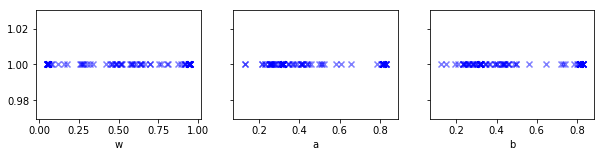

values for w and proportion
0.919 0.02
0.946 0.11
0.26 0.01
0.638 0.01
0.587 0.01
0.951 0.07
0.802 0.01
0.636 0.01
0.813 0.01
0.945 0.05
0.936 0.01
0.058 0.01
0.054 0.12
0.055 0.07
0.119 0.01
0.651 0.01
0.446 0.01
0.917 0.01
0.571 0.01
0.305 0.01
0.475 0.01
0.491 0.01
0.667 0.01
0.757 0.01
0.943 0.01
0.523 0.01
0.049 0.03
0.581 0.01
0.77 0.01
0.05 0.01
0.895 0.01
0.642 0.01
0.267 0.01
0.61 0.01
0.421 0.01
0.514 0.01
0.484 0.01
0.277 0.01
0.322 0.01
0.155 0.01
0.064 0.01
0.178 0.01
0.457 0.01
0.595 0.01
0.874 0.01
0.515 0.01
0.342 0.01
0.083 0.01
0.698 0.01
0.262 0.01
0.079 0.01
0.509 0.01
0.695 0.01
0.052 0.01
0.583 0.01
0.913 0.01
0.942 0.01
0.458 0.01
0.487 0.01
0.282 0.01

values for a and proportion
0.311 0.01
0.266 0.01
0.521 0.01
0.318 0.16
0.408 0.01
0.32 0.07
0.291 0.01
0.806 0.01
0.348 0.01
0.381 0.01
0.279 0.01
0.42 0.01
0.497 0.01
0.83 0.01
0.25 0.01
0.455 0.01
0.446 0.01
0.257 0.01
0.302 0.01
0.815 0.11
0.786 0.01
0.315 0.01
0.267 0.01
0.344 0.01
0.437 0.01
0.248 0.01
0.812

In [12]:
# plot the results
plt.rcParams["figure.figsize"] = [10,2]
fig, ax = plt.subplots(1, 3, sharey=True)
for i,(key,values) in enumerate(results.items()):
    values = sorted(values)
    ax[i].scatter(values, [1]*len(values), marker='x', alpha=.5, linewidths=.01, color='blue', label=key)
    ax[i].set_xlabel(key)
    
plt.show()
plt.close()

# print results
for key,val in results.items():
    print("values for {} and proportion".format(key))
    val = [round(v,3) for v in val]
    for v in set(val):
        print(v, val.count(v)/len(val))
    print()
    
print("values for (w,a,b) and proportion")
val = list()
for i in range(len(results['w'])):
    val.append((round(results['w'][i],3), round(results['a'][i],3), round(results['b'][i],3)))
for v in set(val):
    print(v, val.count(v)/len(val))

Set w,a,b to the most observed values and compute Q accordingly.

In [13]:
w, a, b = max([(v, val.count(v)/len(val)) for v in set(val)], key=itemgetter(1))[0]
for (i,j) in node_pairs:
    Q[i,j] = w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j])
    Q[i,j] /= w * a**E[i,j] * (1-a)**(N[i,j]-E[i,j]) + (1-w) * b**E[i,j] * (1-b)**(N[i,j]-E[i,j])
print(w,a,b)

0.946 0.318 0.816


Plot E vs Q.

Text(0, 0.5, 'a posteriori edge proba')

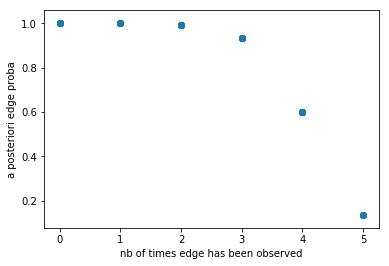

In [25]:
plt.rcParams["figure.figsize"] = [6,4]
x2plot = [E[e] for e in node_pairs]
y2plot = [Q[e] for e in node_pairs]
plt.scatter(x2plot, y2plot)
plt.xlabel("nb of times edge has been observed")
plt.ylabel("a posteriori edge proba")

Scatter plot Q vs real edges.

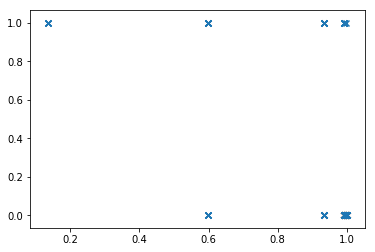

In [27]:
real = [int(e in G.edges) for e in Q]
plt.scatter(Q.values(), real, marker='x')

Compare edges in real graph vs their posterior probability.

Text(0, 0.5, 'prob of actual existence')

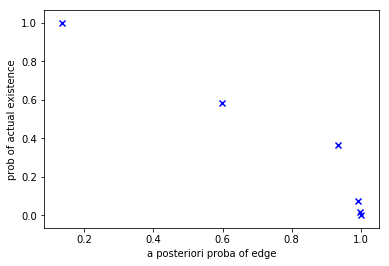

In [20]:
Qval = list(Q.values())
Qval_unique = sorted(set(Qval))
real_edge_prob = list()

for q in Qval_unique:
    real_edge_prob.append(len([e for e in G.edges if Q[e]==q]) / len([e for e in Q if Q[e]==q]))
#     print(q, real_edge_prob[-1])
    
plt.scatter(Qval_unique, real_edge_prob, marker='x', color='blue')
plt.xlabel("a posteriori proba of edge")
plt.ylabel("prob of actual existence")

Text(0, 0.5, 'Normalized prop')

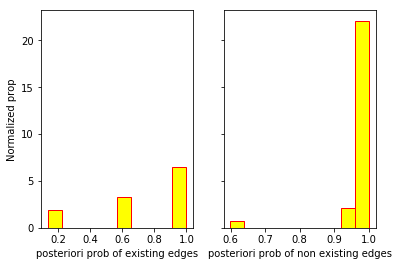

In [21]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].hist([Q[e] for e in G.edges], density=True, facecolor='yellow', edgecolor='red')
ax[0].set_xlabel("posteriori prob of existing edges")
ax[1].hist([Q[e] for e in node_pairs if e not in G.edges], density=True, facecolor='yellow', edgecolor='red')
ax[1].set_xlabel("posteriori prob of non existing edges")
ax[0].set_ylabel("Normalized prop")

Compare expected degrees.

In [22]:
print("Expected degree observed : {} with variance ={}".format(2*sum(Q.values())/n, "?"))
print("Real expected degree : ", np.mean(G.degree()))

Expected degree observed : 17.975115704010395 with variance =?
Real expected degree :  6.0
